In [1]:
import pandas as pd
import numpy as np
import random as rnd
import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import *


In [2]:
train_df = pd.read_csv('data/train_longevity.csv')
test_df = pd.read_csv('data/test_longevity.csv')


In [3]:
print(train_df.columns.values)


['Id' 'Longevity' 'Education' 'Sex' 'Age' 'Pet' 'Children' 'Region'
 'Activity' 'MedExam' 'Sport']


In [4]:
print(test_df.columns.values)

['Id' 'Education' 'Sex' 'Age' 'Pet' 'Children' 'Region' 'Activity'
 'MedExam' 'Sport' 'Longevity']


In [5]:
train_df[['Education', 'Longevity']].groupby(['Education'], as_index=False).mean().sort_values(by='Longevity', ascending=False)

,Education,Longevity
0,1,0.625000
1,2,0.471591
2,3,0.245243


In [6]:
train_df[['Sex', 'Longevity']].groupby(['Sex'], as_index=False).mean().sort_values(by='Longevity', ascending=False)


,Sex,Longevity
1,male,0.743333
0,female,0.190305


In [7]:
train_df[['Pet', 'Longevity']].groupby(['Pet'], as_index=False).mean().sort_values(by='Longevity', ascending=False)

,Pet,Longevity
1,1,0.532020
2,2,0.481481
0,0,0.345361
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [8]:
train_df[['Children', 'Longevity']].groupby(['Children'], as_index=False).mean().sort_values(by='Longevity', ascending=False)

,Children,Longevity
1,1,0.535088
2,2,0.512821
3,3,0.500000
0,0,0.345092
5,5,0.250000
4,4,0.000000
6,6,0.000000


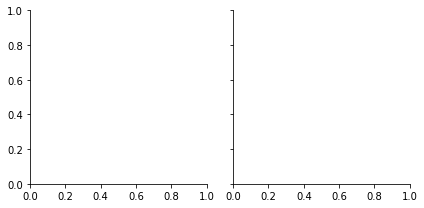

In [9]:
g = sns.FacetGrid(train_df, col='Longevity')


In [10]:
train_df['Age'].unique()
test_df['Age'].unique()

array(['76', '73', nan, '75', '74', '71', '72', '77', '78', '70', '80',
       '#ЗНАЧ!'], dtype=object)

In [11]:
idmax1 = train_df['Age'].value_counts().idxmax()
idmax2 = test_df['Age'].value_counts().idxmax()

In [12]:
train_df['Age'] = train_df['Age'].map(lambda v: idmax1 if v == '#ЗНАЧ!' else  v).astype(float)
test_df['Age'] = test_df['Age'].map(lambda v: idmax2 if v == '#ЗНАЧ!' else  v).astype(float)

In [13]:
train_df['Age'] = train_df['Age'].map(lambda v: idmax1 if math.isnan(v) else v).astype(float)
test_df['Age'] = test_df['Age'].map(lambda v: idmax2 if math.isnan(v) else v).astype(float)

In [14]:
test_df['Age'].unique()

array([76., 73., 75., 74., 71., 72., 77., 78., 70., 80.])

In [15]:
train_df['Age'].unique()

array([73., 75., 74., 77., 70., 72., 71., 78., 76., 79., 80.])

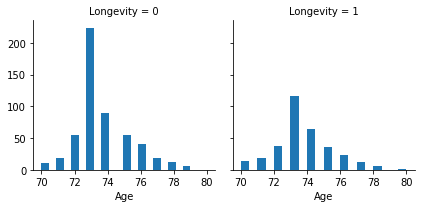

In [16]:
g.map(plt.hist, 'Age', bins=20)

In [17]:
train_df.corr()
test_df.corr()

,Id,Education,Age,Pet,Children,Region,Activity,Longevity
Id,1.000000,-0.026668,-0.010238,-0.002077,0.027452,-0.089471,0.041474,0.002348
Education,-0.026668,1.000000,-0.481281,0.018605,0.034212,0.582938,-0.564909,-0.201045
Age,-0.010238,-0.481281,1.000000,-0.057892,-0.003999,-0.257800,0.351481,0.003602
Pet,-0.002077,0.018605,-0.057892,1.000000,0.297549,-0.021218,0.172817,0.018541
Children,0.027452,0.034212,-0.003999,0.297549,1.000000,-0.005437,0.226831,0.159130
Region,-0.089471,0.582938,-0.257800,-0.021218,-0.005437,1.000000,-0.329336,-0.102071
Activity,0.041474,-0.564909,0.351481,0.172817,0.226831,-0.329336,1.000000,0.233480
Longevity,0.002348,-0.201045,0.003602,0.018541,0.159130,-0.102071,0.233480,1.000000


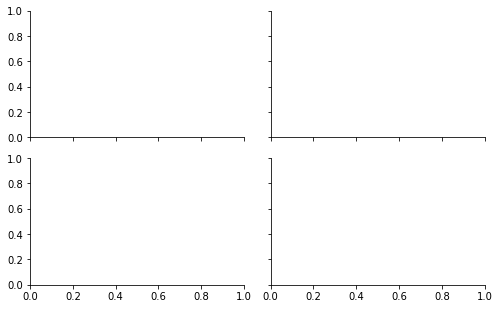

In [18]:
grid = sns.FacetGrid(train_df, row='Sport', col='Longevity', height=2.2, aspect=1.6)

In [19]:
grid.map(sns.barplot, 'Sex', 'Activity', alpha=.5, ci=None)

c:\users\thanh\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


In [20]:
grid.add_legend()

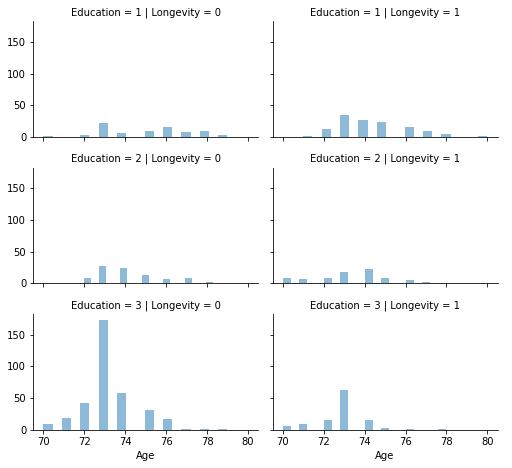

In [21]:
grid = sns.FacetGrid(train_df, col='Longevity', row='Education', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

c:\users\thanh\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


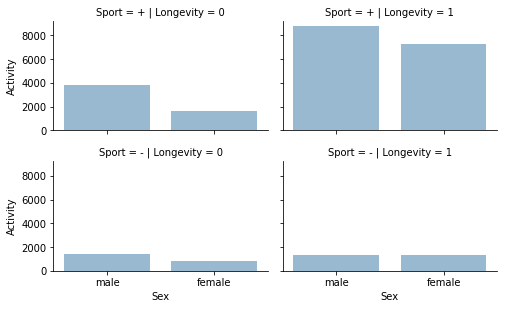

In [22]:
grid = sns.FacetGrid(train_df, row='Sport', col='Longevity', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Activity', alpha=.5, ci=None)
grid.add_legend()

In [23]:
del train_df["MedExam"]
del test_df["MedExam"]
del train_df['Id']
del test_df['Id']
del train_df['Region']
del test_df['Region']
del train_df['Activity']
del test_df['Activity']

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longevity  857 non-null    int64  
 1   Education  857 non-null    int64  
 2   Sex        857 non-null    object 
 3   Age        857 non-null    float64
 4   Pet        857 non-null    int64  
 5   Children   857 non-null    int64  
 6   Sport      236 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 47.0+ KB


In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Education  452 non-null    int64  
 1   Sex        452 non-null    object 
 2   Age        452 non-null    float64
 3   Pet        452 non-null    int64  
 4   Children   452 non-null    int64  
 5   Sport      157 non-null    object 
 6   Longevity  452 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 24.8+ KB


In [26]:
train_df['Sport'].unique()

array([nan, '+', '-'], dtype=object)

In [27]:
train_df['Age'].unique()

array([73., 75., 74., 77., 70., 72., 71., 78., 76., 79., 80.])

In [28]:
train_df['Sport'] = train_df['Sport'].map(lambda v: 1 if v == '+' else v)
train_df['Sport'] = train_df['Sport'].map(lambda v: 0 if v == '-' else v)
train_df.fillna(value =1, inplace = True)
train_df['Sport'] = train_df['Sport'].map(lambda v: v if v else v).astype(np.int64)

In [29]:
train_df['Sport'].unique()

array([1, 0], dtype=int64)

In [30]:
test_df.fillna(value =0, inplace = True)
test_df['Sport'] = test_df['Sport'].map(lambda v: 1 if v == '+' else v)
test_df['Sport'] = test_df['Sport'].map(lambda v: 0 if v == '-' else v)
test_df['Sport'] = test_df['Sport'].map(lambda v: v if v else v).astype(np.int64)


In [31]:
test_df['Sport'].unique()

array([0, 1], dtype=int64)

In [32]:
train_df['isAlone'] = train_df.apply(lambda x: 1 if x['Children'] + x['Pet'] == 0 else 0 , axis=1)
test_df['isAlone'] = test_df.apply(lambda x: 1 if x['Children'] + x['Pet'] == 0 else 0 , axis=1)

In [33]:
train_df['isAlone'].unique()

array([0, 1], dtype=int64)

In [34]:
train_df['Age'] = train_df['Age'].map(lambda v: 0 if v <= 70  else v)

In [35]:
train_df['Age'] = train_df['Age'].map(lambda v: 1 if v > 70 and v <= 72  else v)

In [36]:
train_df['Age'] = train_df['Age'].map(lambda v: 2 if v > 72 and v <= 74 else v)

In [37]:
train_df['Age'] = train_df['Age'].map(lambda v: 3 if v > 74 and v <= 76  else v)

In [38]:
train_df['Age'] = train_df['Age'].map(lambda v: 4 if v > 76 and v <= 78  else v)

In [39]:
train_df['Age'] = train_df['Age'].map(lambda v: 5 if v > 78  else v)

In [40]:
train_df['Age'].unique()

array([2., 3., 4., 0., 1., 5.])

In [41]:
train_df['Age'] = train_df['Age'].map(lambda v: v if True else v).astype(np.int64)

In [42]:
train_df['Age'].unique()

array([2, 3, 4, 0, 1, 5], dtype=int64)

In [44]:

test_df['Age'] = test_df['Age'].map(lambda v: 0 if v <= 70  else v).astype(np.int64)
test_df['Age'] = test_df['Age'].map(lambda v: 1 if v > 70 and v <= 72  else v).astype(np.int64)
test_df['Age'] = test_df['Age'].map(lambda v: 2 if v > 72 and v <= 74 else v)
test_df['Age'] = test_df['Age'].map(lambda v: 3 if v > 74 and v <= 76  else v)
test_df['Age'] = test_df['Age'].map(lambda v: 4 if v > 76 and v <= 78  else v)
test_df['Age'] = test_df['Age'].map(lambda v: 5 if v > 78  else v)
test_df['Age'].unique()

array([3, 2, 1, 4, 0, 5], dtype=int64)

In [45]:
train_df['Sex'] = train_df['Sex'].map(lambda v: 1 if v == 'female' else 0).astype(np.int64)
test_df['Sex'] = test_df['Sex'].map(lambda v: 1 if v == 'female' else 0).astype(np.int64)


In [46]:
train_df.head()

,Longevity,Education,Sex,Age,Pet,Children,Sport,isAlone
0,0,3,1,2,1,0,1,0
1,1,1,0,3,1,0,1,0
2,1,3,0,2,0,0,1,1
3,1,1,0,2,1,0,1,0
4,0,3,1,2,0,0,1,1


In [47]:
test_df.head()

,Education,Sex,Age,Pet,Children,Sport,Longevity,isAlone
0,1,1,3,0,0,0,1,1
1,3,0,2,0,3,1,1,0
2,3,1,2,0,0,1,0,1
3,3,1,3,2,0,0,0,0
4,2,1,2,1,0,0,0,0


In [48]:
X_train = train_df.drop('Longevity', axis =1)
Y_train = train_df['Longevity']
# X_test = test_df.drop('Longevity', axis = 1)

In [51]:
X_test = test_df.drop('Longevity', axis = 1)
X_test

,Education,Sex,Age,Pet,Children,Sport,isAlone
0,1,1,3,0,0,0,1
1,3,0,2,0,3,1,0
2,3,1,2,0,0,1,1
3,3,1,3,2,0,0,0
4,2,1,2,1,0,0,0
...,...,...,...,...,...,...,...
447,3,1,2,0,0,0,1
448,1,0,3,0,0,1,1
449,3,1,3,0,0,0,1
450,3,1,2,0,0,0,1


In [52]:
X_train

,Education,Sex,Age,Pet,Children,Sport,isAlone
0,3,1,2,1,0,1,0
1,1,0,3,1,0,1,0
2,3,0,2,0,0,1,1
3,1,0,2,1,0,1,0
4,3,1,2,0,0,1,1
...,...,...,...,...,...,...,...
852,3,0,1,1,1,1,0
853,1,0,1,0,1,1,0
854,2,0,3,1,0,1,0
855,3,0,1,0,1,1,0


In [53]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
852    0
853    1
854    0
855    1
856    1
Name: Longevity, Length: 857, dtype: int64

In [55]:
 # Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.81

In [56]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,Sport,0.076417
4,Children,-0.122938
2,Age,-0.332559
3,Pet,-0.410995
6,isAlone,-0.569995
0,Education,-0.848031
1,Sex,-2.413832


In [57]:
import pickle


In [75]:
pickle.dump(logreg, open("./deploy/linearmodel.pkl","wb"))

In [76]:
from sklearn.neighbors import *
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
Y_pred1 = neigh.predict(X_test)
acc_knn = round(neigh.score(X_train, Y_train) * 100, 2)
acc_knn

83.08

In [77]:
pickle.dump(neigh, open("./deploy/kneighborsmodel.pkl","wb"))

In [78]:
# Linear SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
svc = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
svc.fit(X_train, Y_train) 
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

c:\users\thanh\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


80.05

In [79]:
# Gaussion NB
from sklearn.naive_bayes import GaussianNB
gausNB = GaussianNB()
gausNB.fit(X_train, Y_train)
acc_gaussian = round(gausNB.score(X_train, Y_train) * 100, 2)
acc_gaussian


79.35

In [80]:
from sklearn.ensemble import RandomForestClassifier
ranFor = RandomForestClassifier(max_depth=2, random_state=0)
ranFor.fit(X_train, Y_train)
acc_random_forest = round(ranFor.score(X_train, Y_train) * 100, 2)
acc_random_forest

80.51

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
sgd.fit(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.58

In [82]:
from sklearn.tree import DecisionTreeClassifier
deTree = DecisionTreeClassifier(random_state=0)
deTree.fit(X_train, Y_train)
acc_decision_tree = round(deTree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.95

In [84]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,Decision Tree,84.95
0,KNN,83.08
2,Random Forest,80.51
5,Linear SVC,80.05
1,Logistic Regression,79.81
4,Stochastic Gradient Decent,79.58
3,Naive Bayes,79.35


In [85]:
pickle.dump(deTree, open("./deploy/decissiontreemodel.pkl","wb"))